In [1]:
%load_ext autoreload
%autoreload 2
import dataset
from glob import glob
TARGET_SIZE = (48, 48)

/home/mkk/anaconda3/envs/shelfwise_kk/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
train_images = glob("dataset/omniglot/python/images_background/*/*/*.png")
assert len(train_images) != 0, "No images. Unzip files."

In [10]:
validation_images = glob("dataset/omniglot/python/images_evaluation/*/*/*.png")
assert len(validation_images) != 0, "No images. Unzip files."

In [14]:
print(f'omniglot_training_{TARGET_SIZE[0]}_{TARGET_SIZE[1]}')

omniglot_training_48_48


In [15]:
dataset.build_dataset(
    train_images, 
    out_name=f'omniglot_training_{TARGET_SIZE[0]}_{TARGET_SIZE[1]}')

100%|██████████| 19280/19280 [00:28<00:00, 755.45it/s]


In [17]:
dataset.build_dataset(
    validation_images, 
    out_name=f'omniglot_validation_{TARGET_SIZE[0]}_{TARGET_SIZE[1]}')

100%|██████████| 13180/13180 [00:19<00:00, 672.09it/s]


# Test dataset

In [18]:
batch_size = 32


In [19]:
import plotting

In [20]:
import tensorflow as tf
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [21]:
train_input_func, num_train_examples = dataset.get_input_function(
    "data/omniglot_training_48_48.pkl", 
    batch_size, do_augmentation=True)
valid_input_func, num_valid_examples = dataset.get_input_function(
    "data/omniglot_validation_48_48.pkl", 
    batch_size, do_augmentation=False)
training_generator = train_input_func()
validation_generator = valid_input_func()
num_train_examples, num_valid_examples

(19280, 13180)

In [27]:
%timeit  sess.run(training_generator)

10 loops, best of 3: 24.3 ms per loop


In [26]:
%timeit  sess.run(validation_generator)

1000 loops, best of 3: 1.66 ms per loop


In [22]:
features, labels = sess.run(training_generator)

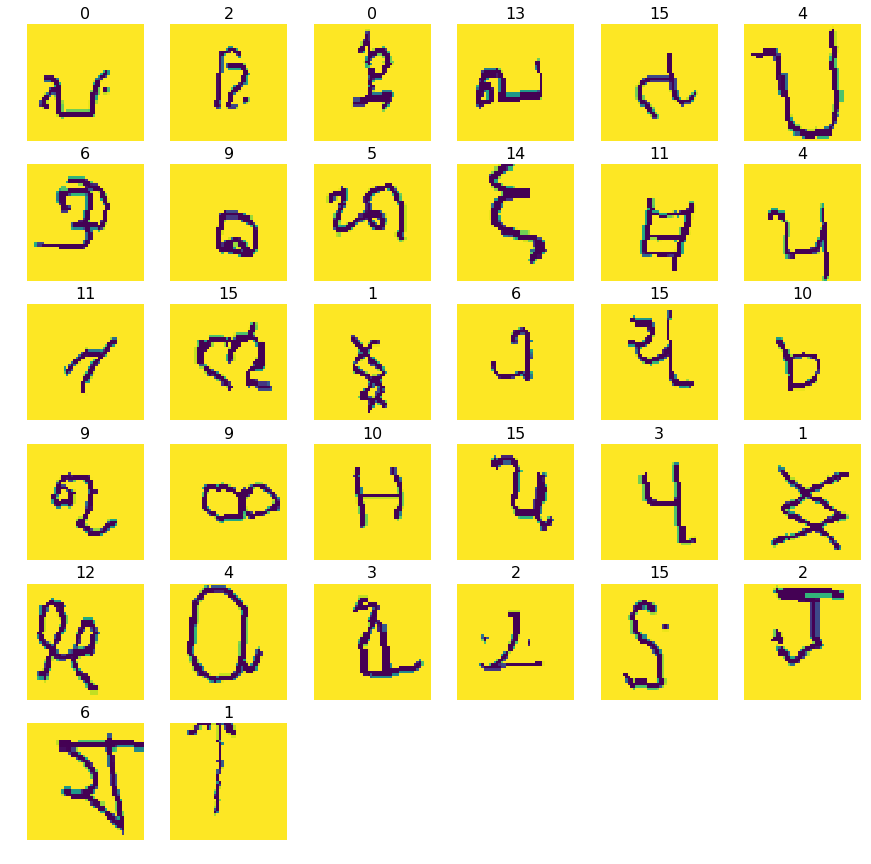

In [33]:
plotting.plots(features['image'][:, :, :, 0], rows=6, figsize=(15, 15), titles=labels['label'].argmax(-1))

In [34]:
features, labels = sess.run(validation_generator)

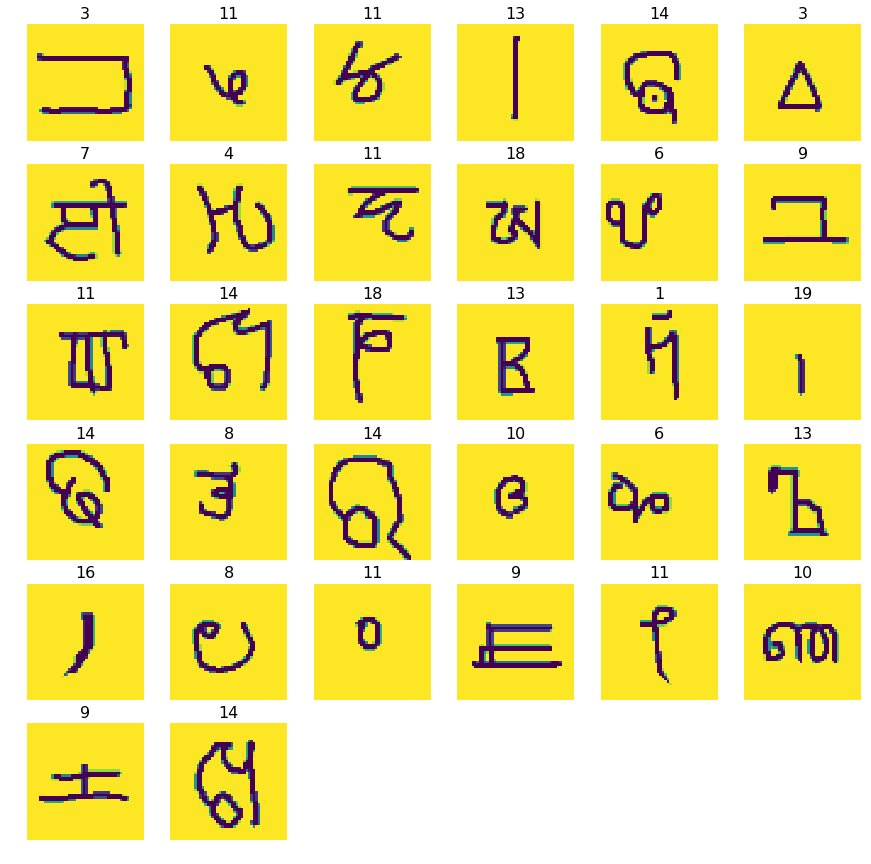

In [35]:
plotting.plots(features['image'][:, :, :, 0], rows=6, figsize=(15, 15), titles=labels['label'].argmax(-1))